# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**



In [4]:
import numpy as np

a=np.zeros(10)
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [33]:
#!pip install nltk

     |████████████████████████████████| 1.4 MB 545 kB/s eta 0:00:01
     |████████████████████████████████| 284 kB 81 kB/s eta 0:00:011
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434677 sha256=551824c9e11d79b49fccf6d3f6cc9dd7dc3dd032c219005985b228af0668c937
  Stored in directory: /Users/veronica/Library/Caches/pip/wheels/ff/d5/7b/f1fb4e1e1603b2f01c2424dd60fbcc50c12ef918bafc44b155
Successfully built nltk


In [1]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
# Esto sirve para configurar NLTK. La primera vez puede tardar un poco
#nltk.download('punkt')
#nltk.download('stopwords')

In [2]:
dev=pd.read_json('dataset_amazon/dataset_es_dev.json', lines= True)

/Users/veronica/opt/anaconda3/envs/INE/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


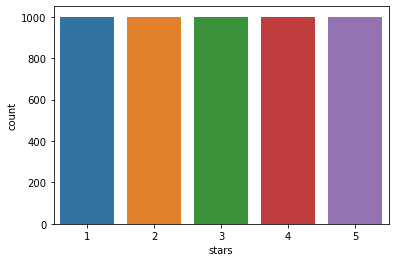

In [3]:
sns.countplot(dev.stars)
plt.show()

In [4]:
train=pd.read_json('dataset_amazon/dataset_es_train.json', lines= True)

In [5]:
train.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [6]:
train.describe()

,stars
count,200000.000000
mean,3.000000
std,1.414217
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


/Users/veronica/opt/anaconda3/envs/INE/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


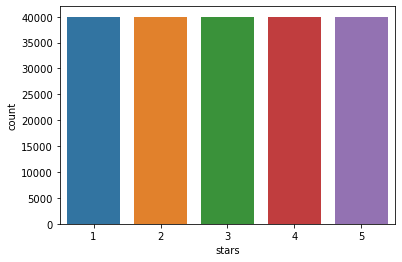

In [7]:
sns.countplot(train.stars)
plt.show()

In [8]:
test=pd.read_json('dataset_amazon/dataset_es_train.json', lines= True)
test.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


/Users/veronica/opt/anaconda3/envs/INE/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


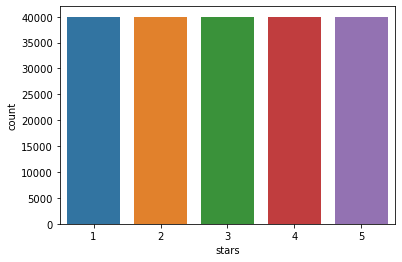

In [9]:
sns.countplot(test.stars)
plt.show()

In [557]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

NameError: name 'text' is not defined

In [ ]:
# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Normalización

Para normalizar los comentarios realizaremos las siguientes acciones:
- Pasamos las frases a minúsculas.
- Eliminamos los signos de puntuación.
- Eliminamos las palabras con menos de 3 caracteres.
- Eliminamos las Stop-Words.
- Eliminamos las palabras que empiecen por '@' o 'http'.
- Pasamos la palabra a su lema
- Eliminamos los acentos


Referencias:

- https://github.com/RicardoMoya/NLP_with_Python/blob/master/Ejercicios_Resueltos/10_Ejercicio2_Clasificacion_Textos_Scikit_TFIDF_Resuelto.ipynb
- https://relopezbriega.github.io/blog/2017/09/23/procesamiento-del-lenguaje-natural-con-python/
- https://medium.com/datos-y-ciencia/comenzando-con-spacy-para-procesamiento-de-lenguaje-natural-e8cf24a18a5a
- https://medium.com/@yeralway1/primeros-pasos-en-nlp-con-spacy-un-vistazo-general-734686843a57
- https://github.com/RicardoMoya/NLP_with_Python/blob/master/Ejercicios_Resueltos/23_Ejercicio4_Topic_Modeling_Noticias_BBC_Resuelto.ipynb

In [11]:
reviews=train.review_body
reviews

0         Nada bueno se me fue ka pantalla en menos de 8...
1         Horrible, nos tuvimos que comprar otro porque ...
2         Te obligan a comprar dos unidades y te llega s...
3         No entro en descalificar al vendedor, solo pue...
4                      Llega tarde y co la talla equivocada
                                ...                        
199995    Mando funciona perfectamente y cumple con toda...
199996    Compré la batería con cierta reticencia, pero ...
199997             Buena calidad. Satisfecha con la compra.
199998                   Perfecto para el cumple de mi hijo
199999    Súper bien! Las brochas son buenas, no sé meno...
Name: review_body, Length: 200000, dtype: object

In [12]:
import spacy
#python -m spacy download es_core_news_sm

In [13]:
nlp = spacy.load('es_core_news_sm')

In [140]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

In [143]:
tokenizer = ToktokTokenizer()
#stopword_list = nltk.corpus.stopwords.words('english')
stopword_list=  nltk.corpus.stopwords.words('spanish')

In [14]:
introduction_text = reviews[0]
introduction_doc = nlp(introduction_text)
# Extract tokens for the given doc
print ([token.text for token in introduction_doc])

['Nada', 'bueno', 'se', 'me', 'fue', 'ka', 'pantalla', 'en', 'menos', 'de', '8', 'meses', 'y', 'no', 'he', 'recibido', 'respuesta', 'del', 'fabricante']


In [15]:
#La forma de las palabras y saber si la palabra contiene caracteres #alfanumericos,si si devuelve True.
doc=nlp(introduction_text)
print(doc)
for palabra in doc[:20]:
    print(palabra.text,palabra.shape_,palabra.is_alpha)

Nada bueno se me fue ka pantalla en menos de 8 meses y no he recibido respuesta del fabricante
Nada Xxxx True
bueno xxxx True
se xx True
me xx True
fue xxx True
ka xx True
pantalla xxxx True
en xx True
menos xxxx True
de xx True
8 d False
meses xxxx True
y x True
no xx True
he xx True
recibido xxxx True
respuesta xxxx True
del xxx True
fabricante xxxx True


In [16]:
for w in doc:
    print(w.text,w.lemma_,w.pos_)

Nada nada PRON
bueno bueno ADJ
se él PRON
me yo PRON
fue ser AUX
ka kar AUX
pantalla pantalla NOUN
en en ADP
menos menos ADV
de de ADP
8 8 NUM
meses mes NOUN
y y CCONJ
no no ADV
he haber AUX
recibido recibir VERB
respuesta respuesta NOUN
del del ADP
fabricante fabricante NOUN


In [17]:
stop =  nltk.corpus.stopwords.words('spanish')
#print(stop)
palabras=[token.text for token in introduction_doc]
[word for word in palabras if word not in stop]

['Nada',
 'bueno',
 'ka',
 'pantalla',
 'menos',
 '8',
 'meses',
 'recibido',
 'respuesta',
 'fabricante']

In [18]:
freq = nltk.FreqDist(palabras)
freq

FreqDist({'Nada': 1, 'bueno': 1, 'se': 1, 'me': 1, 'fue': 1, 'ka': 1, 'pantalla': 1, 'en': 1, 'menos': 1, 'de': 1, ...})

In [19]:
doc_token=[f"{token.lower_}: {token.is_stop}" for token in doc]
doc_token

['nada: True',
 'bueno: True',
 'se: True',
 'me: True',
 'fue: True',
 'ka: False',
 'pantalla: False',
 'en: True',
 'menos: True',
 'de: True',
 '8: False',
 'meses: False',
 'y: False',
 'no: True',
 'he: True',
 'recibido: False',
 'respuesta: False',
 'del: True',
 'fabricante: False']

In [20]:
set((token.lemma_.lower() for token in doc))

{'8',
 'bueno',
 'de',
 'del',
 'en',
 'fabricante',
 'haber',
 'kar',
 'menos',
 'mes',
 'nada',
 'no',
 'pantalla',
 'recibir',
 'respuesta',
 'ser',
 'y',
 'yo',
 'él'}

In [21]:
#!pip install unicodedata2

In [22]:
import re
from unicodedata import normalize

s = "Pingüino: Málãgà ês uñ̺ã cíudãd fantástica y èn Logroño me pica el... moñǫ̝̘̦̞̟̩̐̏̋͌́ͬ̚͡õ̪͓͍̦̓ơ̤̺̬̯͂̌͐͐͟o͎͈̳̠̼̫͂̊"


# -> NFD y eliminar diacríticos
s = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", s), 0, re.I
    )

# -> NFC
s = normalize( 'NFC', s)

print( s )

Pinguino: Malaga es una ciudad fantastica y en Logroño me pica el... moñoooo


In [23]:
introduction_text = ('Hola chicos'
...     ' Aprendiendo NLP con Spacy.')
introduction_doc = nlp(introduction_text)
# Extract tokens for the given doc
print ([token.text for token in introduction_doc])

['Hola', 'chicos', 'Aprendiendo', 'NLP', 'con', 'Spacy', '.']


In [24]:
about_text =  """
El accidente de Chernóbil fue un accidente nuclear sucedido el 26 de abril de 1986 en la central nuclear Vladímir Ilich Lenin, ubicada en el norte de Ucrania, que en ese momento pertenecía a la Unión de Repúblicas Socialistas Soviéticas, a 3 km de la ciudad de Prípiat, a 18  km de la ciudad de Chernóbil y a 17 km de la frontera con Bielorrusia.
Considerado, junto con el accidente nuclear de Fukushima I en Japón en 2011, como el más grave en la Escala Internacional de Accidentes Nucleares (accidente mayor, nivel 7), y suele ser incluido entre los grandes desastres medioambientales de la historia.
Las causas y desarrollo del accidente son objeto de controversias. Existe un consenso general en que desde el día anterior se venía realizando una prueba que requería reducir la potencia, durante la cual se produjeron una serie de desequilibrios en el reactor 4 de esta central nuclear, que desembocaron en el sobrecalentamiento descontrolado del núcleo del reactor nuclear y en una o dos explosiones sucesivas, seguidas de un incendio generalizado, que volaron la tapa del reactor de 1200 toneladas y expulsaron grandes cantidades de materiales radiactivos a la atmósfera, formando una nube radiactiva que se extendió por Europa y América del Norte.
La cantidad de dióxido de uranio, carburo de boro, óxido de europio, erbio, aleaciones de circonio y grafito expulsados,6​ materiales radiactivos y/o tóxicos, que se estimó fue unas 500 veces mayor que el liberado por la bomba atómica arrojada en Hiroshima en 1945, causó la muerte de 31 personas en las siguientes dos semanas y llevó al Gobierno de la Unión Soviética a la evacuación de urgencia de 116 000 personas, provocando una alarma internacional al detectarse radiactividad en al menos 13 países de Europa central y oriental.
Después del accidente, se inició un proceso masivo de descontaminación, contención y mitigación que desempeñaron aproximadamente 600 000 personas denominadas liquidadores en las zonas circundantes al lugar del accidente y se aisló un área de 30 km de radio alrededor de la central nuclear conocida como zona de alienación, que sigue aún vigente. Solo una pequeña parte de los liquidadores se vieron expuestos a altos índices de radiactividad.
Dos empleados de la planta murieron como consecuencia directa de la explosión y otros 29 fallecieron en los tres meses siguientes. Unas 1000 personas recibieron grandes dosis de radiación durante el primer día después del accidente, 200 000 personas recibieron alrededor de 100 mSv, 20 000 cerca de 250 mSv y algunos 500 mSv. En total, 600 000 personas recibieron dosis de radiación por los trabajos de descontaminación posteriores al accidente. 5 000 000 de personas vivieron en áreas contaminadas y 400 000 en áreas gravemente contaminadas. Hasta hoy no existen trabajos concluyentes sobre la incidencia real, y no teórica, de este accidente en la mortalidad de la población.
Tras prolongadas negociaciones con el Gobierno ucraniano, la comunidad internacional financió los costes del cierre definitivo de la central, completado el 15 de diciembre de 2000. Inmediatamente después del accidente se construyó un «sarcófago», para cubrir el reactor y aislar el interior del exterior, que se vio degradado con el paso del tiempo por diversos fenómenos naturales, y por las dificultades de construirlo en un ambiente de alta radiación, por lo que corría riesgo de degradarse seriamente. En 2004, se inició la construcción de un nuevo sarcófago para el reactor. El resto de reactores de la central están inactivos.
En noviembre de 2016, treinta años después de la tragedia, se inauguró un nuevo sarcófago, al que se denominó «nuevo sarcófago seguro» (NSC, por sus siglas en inglés), una estructura móvil, la mayor construida hasta la fecha en el mundo, en forma de arco de 110 metros de alto, 150 de ancho y 256 de largo y más de 30 000 toneladas de peso. Se construyó a 180 metros del reactor y luego se ubicó sobre él, desplazándolo mediante un sofisticado sistema de raíles. Se construyó con características que le dieron una durabilidad estimada de más de cien años. El coste final de la estructura fue de 1500 millones de euros, financiado por el Banco Europeo para la Reconstrucción y el Desarrollo (BERD), junto a la colaboración de 28 países que aportaron 1417 millones de euros, y construido por la empresa francesa Novarka. La estructura está equipada con grúas controladas a distancia con el objetivo de ir desmontando la antigua estructura.
"""
about_doc = nlp(about_text)
sentences = list(about_doc.sents)
len(sentences)

for sentence in sentences:
    print (sentence)



El accidente de Chernóbil fue un accidente nuclear sucedido el 26 de abril de 1986 en la central nuclear Vladímir Ilich Lenin, ubicada en el norte de Ucrania, que en ese momento pertenecía a la Unión de Repúblicas Socialistas Soviéticas, a 3 km de la ciudad de Prípiat, a 18  km de la ciudad de Chernóbil y a 17 km de la frontera con Bielorrusia.

Considerado, junto con el accidente nuclear de Fukushima I en Japón en 2011, como el más grave en la Escala Internacional de Accidentes Nucleares (accidente mayor, nivel 7), y suele ser incluido entre los grandes desastres medioambientales de la historia.

Las causas y desarrollo del accidente son objeto de controversias.
Existe un consenso general en que desde el día anterior se venía realizando una prueba que requería reducir la potencia, durante la cual se produjeron una serie de desequilibrios en el reactor 4 de esta central nuclear, que desembocaron en el sobrecalentamiento descontrolado del núcleo del reactor nuclear y en una o dos expl

In [24]:
#La forma de las palabras y saber si la palabra contiene caracteres #alfanumericos,si si devuelve True.
doc=nlp(texto)
print(doc)
for palabra in doc[:20]:
    print(palabra.text,palabra.shape_,palabra.is_alpha)


El accidente de Chernóbil fue un accidente nuclear sucedido el 26 de abril de 1986 en la central nuclear Vladímir Ilich Lenin, ubicada en el norte de Ucrania, que en ese momento pertenecía a la Unión de Repúblicas Socialistas Soviéticas, a 3 km de la ciudad de Prípiat, a 18  km de la ciudad de Chernóbil y a 17 km de la frontera con Bielorrusia.
Considerado, junto con el accidente nuclear de Fukushima I en Japón en 2011, como el más grave en la Escala Internacional de Accidentes Nucleares (accidente mayor, nivel 7), y suele ser incluido entre los grandes desastres medioambientales de la historia.
Las causas y desarrollo del accidente son objeto de controversias. Existe un consenso general en que desde el día anterior se venía realizando una prueba que requería reducir la potencia, durante la cual se produjeron una serie de desequilibrios en el reactor 4 de esta central nuclear, que desembocaron en el sobrecalentamiento descontrolado del núcleo del reactor nuclear y en una o dos explosi

In [25]:
docex=nlp('estudiar estudioso estudia estudio estudiando estudiante estudiaba estudió')
for w in docex:
    print(w.text,w.lemma_,w.pos_)

estudiar estudiar VERB
estudioso estudioso ADJ
estudia estudiar VERB
estudio estudio NOUN
estudiando estudiar VERB
estudiante estudiante NOUN
estudiaba estudiar VERB
estudió estudiar VERB


In [22]:
documents = [str(x.encode('utf8')) for x in reviews[1:10].values] # Lista de documentos

In [21]:
reviews[1:10]

1    Horrible, nos tuvimos que comprar otro porque ...
2    Te obligan a comprar dos unidades y te llega s...
3    No entro en descalificar al vendedor, solo pue...
4                 Llega tarde y co la talla equivocada
5    Jamás me llegó y el vendedor nunca contacto co...
6    El paraguas es de muy mala calidad,da la sensa...
7    Tuve que devolverla porque al ser triangular n...
8    Estoy esperando despues de protestar varias ve...
9    Defectuoso. En apariencia muy bien producto, p...
Name: review_body, dtype: object

In [114]:
df=train[1:10]

In [115]:
df

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes
5,es_0779978,product_es_0103315,reviewer_es_0304973,1,Jamás me llegó y el vendedor nunca contacto co...,Jamás me llegó,es,home
6,es_0591840,product_es_0880915,reviewer_es_0642702,1,"El paraguas es de muy mala calidad,da la sensa...",Horroroso!!!,es,luggage
7,es_0173297,product_es_0814677,reviewer_es_0895784,1,Tuve que devolverla porque al ser triangular n...,Poco funcional,es,office_product
8,es_0101300,product_es_0654228,reviewer_es_0789283,1,Estoy esperando despues de protestar varias ve...,No me llego,es,electronics
9,es_0487007,product_es_0877793,reviewer_es_0986278,1,"Defectuoso. En apariencia muy bien producto, p...","Mala calidad, defectuoso",es,kitchen


In [26]:
tokens = []
lemma = []
pos = []

for doc in nlp.pipe(df['review_body'].astype('unicode').values, batch_size=50):
    if doc.is_parsed:
        tokens.append([n.text for n in doc])
        lemma.append([n.lemma_.lower() for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
        tokens.append(None)
        lemma.append(None)
        pos.append(None)

df['species_tokens'] = tokens
df['species_lemma'] = lemma
df['species_pos'] = pos

<ipython-input-26-02c645cb251d>:6: DeprecationWarning: [W107] The property `Doc.is_parsed` is deprecated. Use `Doc.has_annotation("DEP")` instead.
  if doc.is_parsed:
<ipython-input-26-02c645cb251d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species_tokens'] = tokens
<ipython-input-26-02c645cb251d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species_lemma'] = lemma
<ipython-input-26-02c645cb251d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [27]:
df

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,species_tokens,species_lemma,species_pos
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics,"[Horrible, ,, nos, tuvimos, que, comprar, otro...","[horrible, ,, yo, tener, que, comprar, otro, p...","[PROPN, PUNCT, PRON, VERB, SCONJ, VERB, PRON, ..."
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,"[Te, obligan, a, comprar, dos, unidades, y, te...","[tú, obligar, a, comprar, dos, unidad, y, tú, ...","[PRON, VERB, ADP, VERB, NUM, NOUN, CCONJ, PRON..."
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless,"[No, entro, en, descalificar, al, vendedor, ,,...","[no, entrar, en, descalificar, al, vendedor, ,...","[ADV, VERB, ADP, VERB, ADP, NOUN, PUNCT, ADV, ..."
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes,"[Llega, tarde, y, co, la, talla, equivocada]","[llegar, tarde, y, co, el, talla, equivocado]","[VERB, ADV, CCONJ, ADV, DET, NOUN, ADJ]"
5,es_0779978,product_es_0103315,reviewer_es_0304973,1,Jamás me llegó y el vendedor nunca contacto co...,Jamás me llegó,es,home,"[Jamás, me, llegó, y, el, vendedor, nunca, con...","[jamás, yo, llegar, y, el, vendedor, nunca, co...","[ADV, PRON, VERB, CCONJ, DET, NOUN, ADV, VERB,..."
6,es_0591840,product_es_0880915,reviewer_es_0642702,1,"El paraguas es de muy mala calidad,da la sensa...",Horroroso!!!,es,luggage,"[El, paraguas, es, de, muy, mala, calidad, ,, ...","[el, paragua, ser, de, mucho, malo, calidad, ,...","[DET, NOUN, AUX, ADP, ADV, ADJ, NOUN, PUNCT, V..."
7,es_0173297,product_es_0814677,reviewer_es_0895784,1,Tuve que devolverla porque al ser triangular n...,Poco funcional,es,office_product,"[Tuve, que, devolverla, porque, al, ser, trian...","[tener, que, devolver él, porque, al, ser, tri...","[VERB, PRON, VERB, SCONJ, ADP, AUX, VERB, ADV,..."
8,es_0101300,product_es_0654228,reviewer_es_0789283,1,Estoy esperando despues de protestar varias ve...,No me llego,es,electronics,"[Estoy, esperando, despues, de, protestar, var...","[estar, esperar, despu, de, protestar, varios,...","[AUX, VERB, NOUN, ADP, VERB, DET, NOUN, CCONJ,..."
9,es_0487007,product_es_0877793,reviewer_es_0986278,1,"Defectuoso. En apariencia muy bien producto, p...","Mala calidad, defectuoso",es,kitchen,"[Defectuoso, ., En, apariencia, muy, bien, pro...","[defectuoso, ., en, apariencia, mucho, bien, p...","[PROPN, PUNCT, ADP, NOUN, ADV, ADV, NOUN, PUNC..."


# Normalizacion

In [86]:
import string
punct = string.punctuation
print(punct)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [534]:
def dataCleaning(sentence):
    #sentence = remove_accented_chars(sentence)
    doc = nlp(sentence)
    tokens = []
    for token in doc:
        if len(token)>3:
                # Pasamos todo a minúsculas
            if token.lemma_ != '-PRON-':
                  temp = token.lemma_.lower()
            else:
                  temp = token.lower_
            tokens.append(temp)
            clean_tokens = []
            for token in tokens:
                if token not in punct and token not in stopwords:
                    clean_tokens.append(token)
    return clean_tokens

import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    pattern = r'[^a-zA-z0-9\s]' 
    text = re.sub(pattern, '', text)
    
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    text = re.sub(pattern, '', text)
    
    #pattern = r'^\s+$|\s+$'
    pattern = r'^\s*|\s\s*'
    text=re.sub(pattern, ' ', text).strip()
    
   #text = [palabra for palabra in text if len(palabra)>3]

    return text


In [251]:
from spacy.lang.es.stop_words import STOP_WORDS

stopwords = spacy.lang.es.stop_words.STOP_WORDS

In [252]:
stopwords

{'actualmente',
 'acuerdo',
 'adelante',
 'ademas',
 'además',
 'adrede',
 'afirmó',
 'agregó',
 'ahi',
 'ahora',
 'ahí',
 'al',
 'algo',
 'alguna',
 'algunas',
 'alguno',
 'algunos',
 'algún',
 'alli',
 'allí',
 'alrededor',
 'ambos',
 'ampleamos',
 'antano',
 'antaño',
 'ante',
 'anterior',
 'antes',
 'apenas',
 'aproximadamente',
 'aquel',
 'aquella',
 'aquellas',
 'aquello',
 'aquellos',
 'aqui',
 'aquél',
 'aquélla',
 'aquéllas',
 'aquéllos',
 'aquí',
 'arriba',
 'arribaabajo',
 'aseguró',
 'asi',
 'así',
 'atras',
 'aun',
 'aunque',
 'ayer',
 'añadió',
 'aún',
 'bajo',
 'bastante',
 'bien',
 'breve',
 'buen',
 'buena',
 'buenas',
 'bueno',
 'buenos',
 'cada',
 'casi',
 'cerca',
 'cierta',
 'ciertas',
 'cierto',
 'ciertos',
 'cinco',
 'claro',
 'comentó',
 'como',
 'con',
 'conmigo',
 'conocer',
 'conseguimos',
 'conseguir',
 'considera',
 'consideró',
 'consigo',
 'consigue',
 'consiguen',
 'consigues',
 'contigo',
 'contra',
 'cosas',
 'creo',
 'cual',
 'cuales',
 'cualquier',
 

In [485]:
positivo=train.loc[train.stars>3][0:1000]
negativo=train.loc[train.stars<3][0:1000]
positivo.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
120000,es_0006073,product_es_0989772,reviewer_es_0335919,4,"Tiene buena pinta, veremos el resultado",Calidad,es,sports
120001,es_0044521,product_es_0630397,reviewer_es_0209480,4,Entrega rápida como siempre pero falta factura,Falta factura,es,wireless
120002,es_0362587,product_es_0727421,reviewer_es_0620388,4,Está bien y envío rápido,Bueno,es,pc
120003,es_0483689,product_es_0983132,reviewer_es_0298104,4,"Queda muy bien, material duradero y tamaño per...",Material duradero,es,home
120004,es_0729676,product_es_0903356,reviewer_es_0104192,4,Genial aunque huele mucho a pegamento,Buena,es,personal_care_appliances


In [494]:
import numpy as np
np.random.seed(5)
indice=np.random.randint(0,100)
titulo_positivo=positivo.iloc[indice]
titulo_positivo.review_body

'Me han gustado los tirantes, sencillos. La pajarita es brillante y el tono rojo, resalta más que los tirantes. En general bien me ha gustado.'

In [495]:
#for visualization of Entity detection importing displacy from spacy:

from spacy import displacy

nytimes= nlp(titulo_positivo.review_body)
entities=[(i, i.label_, i.label) for i in nytimes.ents]
entities

[(La pajarita, 'MISC', 7654241940133152407),
 (En general bien me ha gustado, 'MISC', 7654241940133152407)]

In [496]:
displacy.render(nytimes, style = "ent",jupyter = True)

In [497]:
for chunk in nytimes.noun_chunks:
   print(chunk.text, chunk.root.text, chunk.root.dep_,
          chunk.root.head.text)

Me Me obj gustado
los tirantes tirantes nsubj gustado
sencillos sencillos nsubj gustado
La pajarita pajarita nsubj brillante
el tono tono conj brillante
los tirantes tirantes obj resalta
general general fixed En
me me obj gustado


In [498]:
displacy.render(nytimes, style="dep", jupyter= True)

# Gráfico de frecuencias

In [535]:
titular_list_clean=[]

i=0
titular_clean=[]
for titular in positivo.review_body:
    titular=remove_accented_chars(str(titular))
    titular_clean=dataCleaning(titular)
    #titular_clean=' '.join(titular_clean)
    titular_list_clean.append(titular_clean)
    i=+1

titular_list_clean_n=[]

i=0
titular_clean_n=[]
for titular in negativo.review_body:
    titular=remove_accented_chars(str(titular))
    titular_clean_n=dataCleaning(titular)
    #titular_clean=' '.join(titular_clean)
    titular_list_clean_n.append(titular_clean_n)
    i=+1

In [525]:
titular_list_clean

[['pinta', 'resultado'],
 ['entrega', 'rapido', 'faltar', 'factura'],
 ['envio', 'rapido'],
 ['quedar', 'material', 'duradero', 'tamanir', 'perfecto'],
 ['genial', 'oler', 'pegamento'],
 ['llegar', 'eliminar', 'mancha'],
 ['esperar', 'calidad'],
 ['plastico',
  'regulero',
  'parecer',
  'romper',
  'rajar',
  'dema',
  'facil',
  'instalacion',
  'funcionar',
  'perfectamente',
  'contentar',
  'compra',
  'barato',
  'ocupar',
  'lavabo',
  'casa',
  'pequena',
  'importante'],
 ['gafa', 'comodasde', 'apariencia', 'robusta', 'estetico', 'actual'],
 ['espalda',
  'goma',
  'dema',
  'hombrera',
  'venir',
  'sentido',
  'poner él',
  'tendre'],
 ['gustar', 'hijo', 'pared', 'escritorio', 'organizacion', 'estudiar'],
 ['toque',
  'elegante',
  'adema',
  'practico',
  'adornar',
  'algun',
  'rinconcito',
  'enchufe',
  'encantar'],
 ['encontrar',
  'fallo',
  'tapa',
  'endeble',
  'mantener él',
  'dema',
  'perfecto',
  'necesitar'],
 ['pequena', 'manejable', 'util'],
 ['vivir',
  'z

In [536]:
todos_titulares_palabras_pos = list(itertools.chain(*titular_list_clean))
todos_titulares_palabras_neg = list(itertools.chain(*titular_list_clean_n))

In [389]:
from collections import Counter

In [537]:
count_pos=Counter(todos_titulares_palabras_pos)
count_neg=Counter(todos_titulares_palabras_neg)


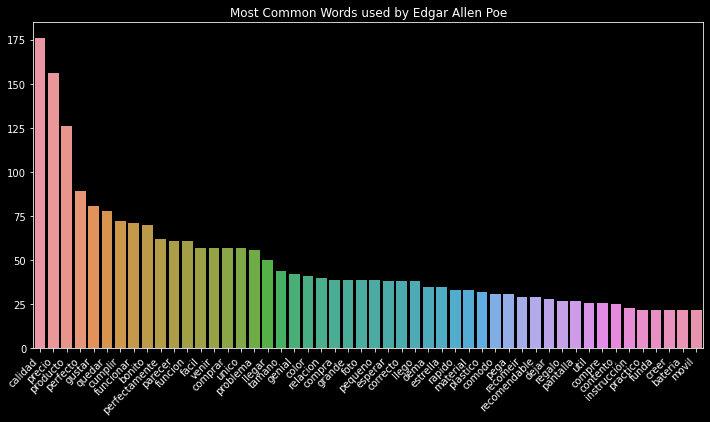

In [540]:
# Use spooky background

# Plot top 25 most frequently occuring words for Edgar Allen Poe
common_words = [word[0] for word in count_pos.most_common(50)]
common_counts = [word[1] for word in count_pos.most_common(50)]
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=common_words, y=common_counts, ax=ax)
plt.title('Most Common Words used by Edgar Allen Poe')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

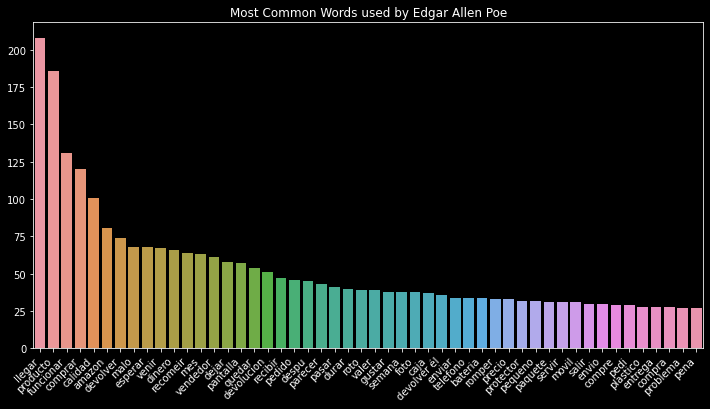

In [539]:
# Plot top 25 most frequently occuring words for Edgar Allen Poe
common_words = [word[0] for word in count_neg.most_common(50)]
common_counts = [word[1] for word in count_neg.most_common(50)]
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=common_words, y=common_counts, ax=ax)
plt.title('Most Common Words used by Edgar Allen Poe')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [561]:
positivo.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
120000,es_0006073,product_es_0989772,reviewer_es_0335919,4,"Tiene buena pinta, veremos el resultado",Calidad,es,sports
120001,es_0044521,product_es_0630397,reviewer_es_0209480,4,Entrega rápida como siempre pero falta factura,Falta factura,es,wireless
120002,es_0362587,product_es_0727421,reviewer_es_0620388,4,Está bien y envío rápido,Bueno,es,pc
120003,es_0483689,product_es_0983132,reviewer_es_0298104,4,"Queda muy bien, material duradero y tamaño per...",Material duradero,es,home
120004,es_0729676,product_es_0903356,reviewer_es_0104192,4,Genial aunque huele mucho a pegamento,Buena,es,personal_care_appliances


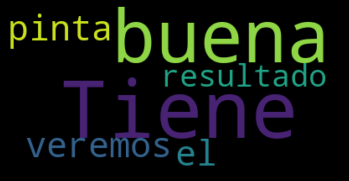

In [562]:
# Start with one review:
text = positivo.review_body.iloc[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

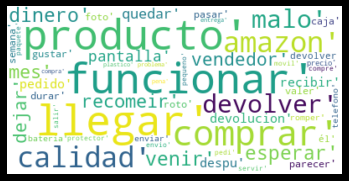

In [568]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(common_words))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Count vectorizer

In [542]:
titular_list_clean=[]

i=0
titular_clean=[]
for titular in c:
    titular=remove_accented_chars(str(titular))
    titular_clean=dataCleaning(titular)
    titular_clean=' '.join(titular_clean)
    titular_list_clean.append(titular_clean)
    i=+1

titular_list_clean_n=[]

i=0
titular_clean_n=[]
for titular in negativo.review_body:
    titular=remove_accented_chars(str(titular))
    titular_clean_n=dataCleaning(titular)
    titular_clean_n=' '.join(titular_clean_n)
    titular_list_clean_n.append(titular_clean_n)
    i=+1

In [543]:
titular_list_clean_pos=pd.Series(titular_list_clean)
titular_list_clean_neg=pd.Series(titular_list_clean_n)
result = pd.concat([titular_list_clean_pos,titular_list_clean_neg])
result.head()

0                              pinta resultado
1                entrega rapido faltar factura
2                                 envio rapido
3    quedar material duradero tamanir perfecto
4                        genial oler pegamento
dtype: object

In [544]:
titular_list_clean_pos.shape

(1000,)

In [545]:
titular_list_clean_neg.shape

(1000,)

In [546]:
list_titulos = list(result.values)

In [548]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1000

# Es decir que cada instancia tendrá 1000 features
cou_vec=CountVectorizer(max_features=max_features) # stop_words="english" , ngram_range=(1, 2)

In [549]:
matriz_titulos = cou_vec.fit_transform(result)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abajo', 'abierto', 'abrir', 'absoluto', 'absorber', 'acabado', 'acabar', 'accesorio', 'aceite', 'aceptable', 'aceptar', 'aconsejar', 'acorde', 'acostumbrar', 'actual', 'adaptador', 'adaptar', 'adecuado', 'adema', 'adhesivo', 'agarrar', 'agradable', 'agua', 'aguantar', 'aguantir', 'agujero', 'ahorrar', 'aire', 'ajustado', 'ajustar', 'ajuste', 'alarma', 'alguien', 'algun', 'altavoz', 'alternativa', 'alto', 'altura', 'aluminio', 'amarillo', 'amazon', 'anadir', 'ancho', 'anclaje', 'ano', 'antena', 'antiguo', 'anunciar', 'anuncio', 'apagar']


# Modelo

In [550]:
label_positivo=np.ones(1000)
label_negativo=np.zeros(1000)

labels=np.concatenate([label_positivo,label_negativo])
labels.shape

(2000,)

In [551]:
matriz_titulos.shape

(2000, 1000)

In [552]:
x = matriz_titulos.toarray()
y = labels

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [553]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.7


In [554]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    names=["No Sarcastico","Sarcastico"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

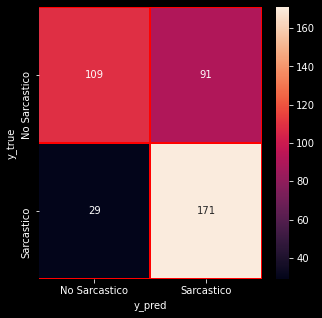

In [555]:
y_pred=nb.predict(xtest)
confusion(ytest,y_pred)